## LDA/Fisher 源码实现 

### 引入相关库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#计算均值,要求输入数据为numpy的矩阵格式，行表示样本数，列表示特征    
def meanX(data):
    return np.mean(data, axis=0) #axis=0表示按照列来求均值，如果输入list,则axis=1


### LDA算法实现

In [3]:
#计算类内离散度矩阵子项si
def compute_si(xi):
    n = xi.shape[0]
    ui = meanX(xi)
    si = 0
    for i in range(0, n):
        si = si + ( xi[i, :] - ui).T * (xi[i, :] - ui )   
    return si

#计算类间离散度矩阵Sb
def compute_Sb(x1, x2):
    dataX=np.vstack((x1,x2))#合并样本   
    print "dataX:", dataX
    #计算均值
    u1=meanX(x1)
    u2=meanX(x2)    
    u=meanX(dataX) #所有样本的均值
    Sb = (u-u1).T * (u-u1) + (u-u2).T * (u-u2)
    return Sb
    
        
def LDA(x1, x2):
    #计算类内离散度矩阵Sw
    s1 = compute_si(x1)
    s2 = compute_si(x2)     
    #Sw=(n1*s1+n2*s2)/(n1+n2)
    Sw = s1 + s2
    
    #计算类间离散度矩阵Sb
    #Sb=(n1*(m-m1).T*(m-m1)+n2*(m-m2).T*(m-m2))/(n1+n2)
    Sb = compute_Sb(x1, x2)
    
    #求最大特征值对应的特征向量    
    eig_value, vec = np.linalg.eig(np.mat(Sw).I*Sb)#特征值和特征向量
    index_vec = np.argsort(-eig_value)#对eig_value从大到小排序，返回索引
    eig_index = index_vec[:1] #取出最大的特征值的索引
    w = vec[:, eig_index] #取出最大的特征值对应的特征向量
    return w

### 构造数据集

In [4]:
def createDataSet():  
    X1 = np.mat(np.random.random((8, 2)) * 5 + 15)  #类别A
    X2 = np.mat(np.random.random((8, 2)) * 5 + 2)   #类别B
    return X1, X2  

x1, x2 = createDataSet()

print x1, x2

[[16.96464962 16.94502501]
 [15.05454667 17.09013667]
 [15.56489963 19.84229387]
 [16.43831074 15.90474953]
 [18.48476088 15.03913508]
 [15.82917037 15.11968731]
 [15.73431849 19.21742217]
 [19.2702835  19.73339472]] [[2.63292147 3.47120986]
 [6.76104203 5.98453328]
 [6.62851068 6.8916269 ]
 [3.77655065 3.40796527]
 [2.3063607  3.40134092]
 [3.09106307 3.41137181]
 [3.29697416 2.28073533]
 [4.97203486 3.18686582]]


### LDA训练

In [5]:
w = LDA(x1, x2)
print "w:",w

dataX: [[16.96464962 16.94502501]
 [15.05454667 17.09013667]
 [15.56489963 19.84229387]
 [16.43831074 15.90474953]
 [18.48476088 15.03913508]
 [15.82917037 15.11968731]
 [15.73431849 19.21742217]
 [19.2702835  19.73339472]
 [ 2.63292147  3.47120986]
 [ 6.76104203  5.98453328]
 [ 6.62851068  6.8916269 ]
 [ 3.77655065  3.40796527]
 [ 2.3063607   3.40134092]
 [ 3.09106307  3.41137181]
 [ 3.29697416  2.28073533]
 [ 4.97203486  3.18686582]]
w: [[0.76741174]
 [0.6411546 ]]


In [6]:
# 编写一个绘图函数
def plotFig(group):  
    fig = plt.figure()  
    plt.ylim(0, 30)  
    plt.xlim(0, 30)  
    ax = fig.add_subplot(111)  
    ax.scatter(group[0,:].tolist(), group[1,:].tolist())  
    plt.show()  

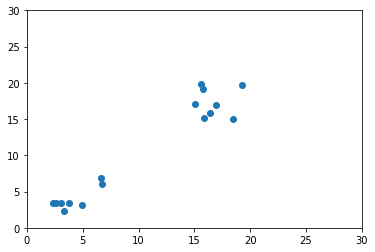

In [9]:
#绘制图形
plotFig(np.hstack((x1.T, x2.T)))  

### 实例测试

In [8]:
test2 = np.mat([2, 8]) 
g = np.dot(w.T, test2.T - 0.5 * (meanX(x1)-meanX(x2)).T)  
print "Output: ", g  

Output:  [[-2.40824965]]


结果输出表示该样本为负样本。